## ANÁLISIS ENCUESTA PROGRAMACIÓN
 
Los objetivos de este cuaderno son la visualización de la información aportada por la encuesta:
    
    - Desglose de los recursos más utilizados por los estudiantes de programación que participan en la encuesta.
    - Su perfil socioeconómico
    - Situación económica
    - Aspiraciones laborales
    

In [1]:
% cd C://Users/Gonzalo/Downloads/

C:\Users\Gonzalo\Downloads


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
%matplotlib inline

In [3]:
prog = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

prog.head()

C:\Users\Gonzalo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
prog.columns.tolist()

In [4]:
prog=prog.replace(np.nan,0)

In [5]:
prog['Gender'] = prog.Gender.replace(0,'Ns/Nc')
prog['EmploymentStatus'] = prog.EmploymentStatus.replace(0,'Ns/Nc')

In [6]:
prog['SchoolDegree'] = prog.SchoolDegree.replace(0,'Ns/Nc')
prog['SchoolMajor'] = prog.SchoolMajor.replace(0,'Ns/Nc')

### Recursos utilizados para aprendizaje

1 Code Events 

In [7]:
code = prog.columns[prog.columns.str.contains('CodeEvent')]
code

Index(['CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC',
       'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons',
       'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone',
       'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls',
       'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode',
       'CodeEventWorkshops'],
      dtype='object')

In [8]:
colss = list(code) + ['Age'] +['CountryLive'] 

In [9]:
pr = prog[colss]

In [17]:
pr.shape

(18175, 18)

In [10]:
colas = list(code)
cd = prog[colas]
cd.head()

,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
cevent = cd.sum(axis=0)
cevent = pd.DataFrame(cevent)
cevent.reset_index()
cevent.rename(columns={'index':'Event',0:'Quantity'},inplace=True)
cevent

,Quantity
CodeEventConferences,1609.0
CodeEventDjangoGirls,165.0
CodeEventFCC,1708.0
CodeEventGameJam,290.0
CodeEventGirlDev,297.0
CodeEventHackathons,1977.0
CodeEventMeetup,2472.0
CodeEventNodeSchool,446.0
CodeEventNone,1076.0
CodeEventRailsBridge,133.0


#### 2) RECURSOS UTILIZADOS PARA APRENDIZAJE 

In [12]:
reso = prog.columns[prog.columns.str.contains('Resource')]
reso

Index(['ResourceCodecademy', 'ResourceCodeWars', 'ResourceCoursera',
       'ResourceCSS', 'ResourceEdX', 'ResourceEgghead', 'ResourceFCC',
       'ResourceHackerRank', 'ResourceKA', 'ResourceLynda', 'ResourceMDN',
       'ResourceOdinProj', 'ResourceOther', 'ResourcePluralSight',
       'ResourceSkillcrush', 'ResourceSO', 'ResourceTreehouse',
       'ResourceUdacity', 'ResourceUdemy', 'ResourceW3S'],
      dtype='object')

In [13]:
# Eliminamos 'Resource' para mayor claridad
reso1 = prog[reso]
reso1.columns = reso1.columns.str.replace('Resource','')
# Número estudiantes utilizan cada recurso
resurce = reso1.sum(axis=0)
resurce  = pd.DataFrame(resurce)
resurce.reset_index()
resurce.rename(columns={'index':'Event',0:'Quantity'},inplace=True)
resurce

,Quantity
Codecademy,9390.0
CodeWars,1848.0
Coursera,4402.0
CSS,4671.0
EdX,3243.0
Egghead,1341.0
FCC,13803.0
HackerRank,2049.0
KA,3800.0
Lynda,2558.0


#### Youtube

In [14]:
you = prog.columns[prog.columns.str.contains('YouTube')]
you

Index(['YouTubeCodeCourse', 'YouTubeCodingTrain', 'YouTubeCodingTut360',
       'YouTubeComputerphile', 'YouTubeDerekBanas', 'YouTubeDevTips',
       'YouTubeEngineeredTruth', 'YouTubeFCC', 'YouTubeFunFunFunction',
       'YouTubeGoogleDev', 'YouTubeLearnCode', 'YouTubeLevelUpTuts',
       'YouTubeMIT', 'YouTubeMozillaHacks', 'YouTubeOther',
       'YouTubeSimplilearn', 'YouTubeTheNewBoston'],
      dtype='object')

In [15]:
yt = prog[you]
yout = yt.sum(axis=0)
yout= pd.DataFrame(yout)
yout.reset_index()
yout.rename(columns={'index':'Event',0:'Quantity'},inplace=True)
yout

,Quantity
YouTubeCodeCourse,956.0
YouTubeCodingTrain,976.0
YouTubeCodingTut360,1397.0
YouTubeComputerphile,1453.0
YouTubeDerekBanas,1847.0
YouTubeDevTips,2619.0
YouTubeEngineeredTruth,993.0
YouTubeFCC,6036.0
YouTubeFunFunFunction,1261.0
YouTubeGoogleDev,3539.0


#### PODCAST

In [16]:
pod = prog.columns[prog.columns.str.contains('Podcast')]
pod = prog[pod]
pod = pod.sum(axis=0)
pod = pd.DataFrame(pod)
pod.reset_index()
pod.rename(columns={'index':'Event',0:'Quantity'},inplace=True)
pod

,Quantity
PodcastChangeLog,403.0
PodcastCodeNewbie,1636.0
PodcastCodePen,773.0
PodcastDevTea,728.0
PodcastDotNET,327.0
PodcastGiantRobots,187.0
PodcastJSAir,726.0
PodcastJSJabber,1123.0
PodcastNone,1061.0
PodcastProgThrowdown,345.0


#### VISUALIZACIÓN

In [17]:
finre = pd.concat([cevent,resurce,yout,pod])
finreb = finre.sort_values(ascending=False,by='Quantity')


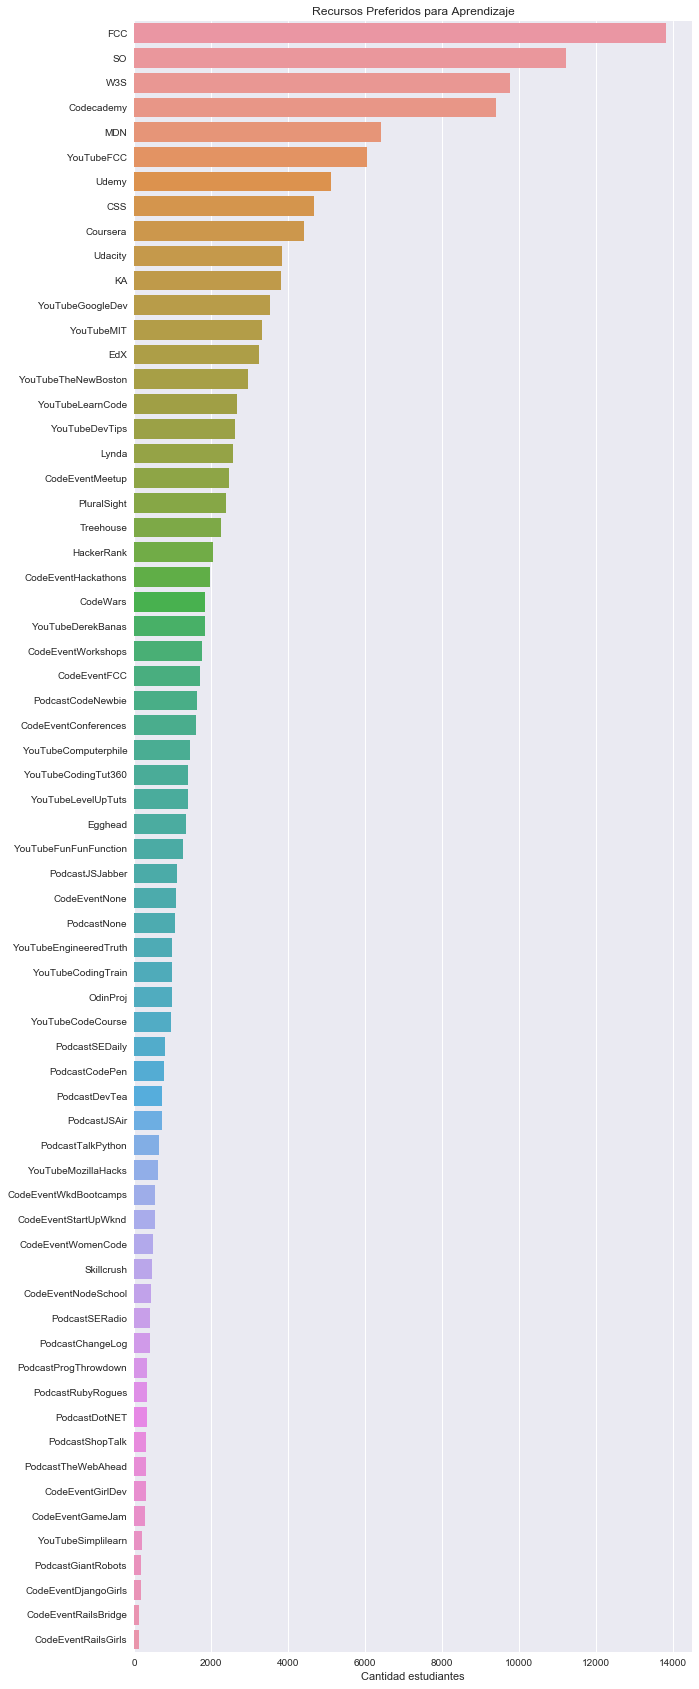

In [18]:
# Gráfico
plt.figure(figsize=(10,30))
sns.barplot(y = finreb.index,x=finreb.Quantity)
plt.title('Recursos Preferidos para Aprendizaje')
plt.xlabel('Cantidad estudiantes')


### 3) PERFIL SOCIOECONÓMICO

In [113]:
prog.columns.tolist()

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

In [19]:
sp = prog[['Age','Gender','CountryLive','EmploymentField','HasChildren','HasDebt','HasFinancialDependents','HasHomeMortgage','HasStudentDebt',
      'IsEthnicMinority','MaritalStatus']]


### Situación económica de los estudiantes

In [20]:
sp1 =prog[['HasChildren','HasDebt','HasFinancialDependents','HasHomeMortgage','HasStudentDebt',
      'IsEthnicMinority','IsUnderEmployed',]]
sp2 = sp1.sum(axis=0)
sp2 = pd.DataFrame(sp2)
sp2.reset_index()
sp2.rename(columns={'index':'Event',0:'Quantity'},inplace=True)
sp2.head()

,Quantity
HasChildren,2351.0
HasDebt,6436.0
HasFinancialDependents,3870.0
HasHomeMortgage,1727.0
HasStudentDebt,3639.0


#### Presupuesto disponible

<function matplotlib.pyplot.show>

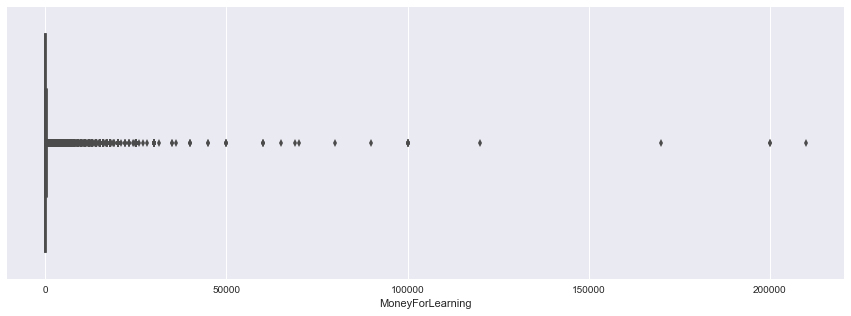

In [21]:
# Media money for learning
plt.figure(figsize=(15,5))
sns.boxplot(x=prog['MoneyForLearning'])
plt.show

#### Ingresos

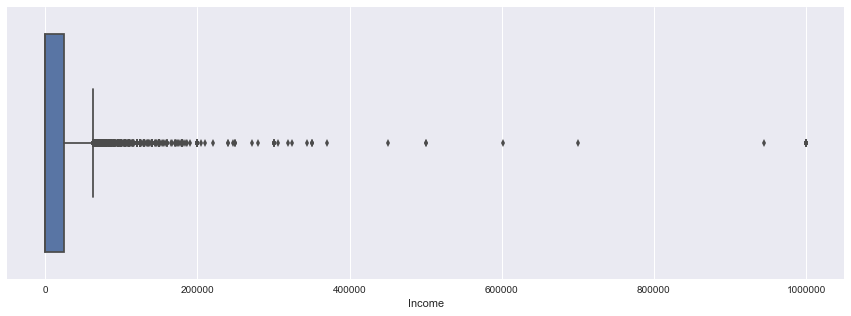

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(x=prog["Income"])
plt.show()

#### Situación Financiera Estudiantes

In [23]:
sp1 =prog[['HasChildren','HasDebt','HasFinancialDependents','HasHomeMortgage','HasStudentDebt',
      'IsEthnicMinority','IsUnderEmployed',]]
sp2 = sp1.sum(axis=0)
sp2 = pd.DataFrame(sp2)
sp2.reset_index()
sp2.rename(columns={'index':'Event',0:'Quantity'},inplace=True)
sp2.head()

,Quantity
HasChildren,2351.0
HasDebt,6436.0
HasFinancialDependents,3870.0
HasHomeMortgage,1727.0
HasStudentDebt,3639.0


In [24]:
# Añadimos porcentajes
sp2['Porcentaje'] = (sp2.Quantity/18175)*100
sp2=sp2.sort_values(ascending=False,by='Porcentaje')

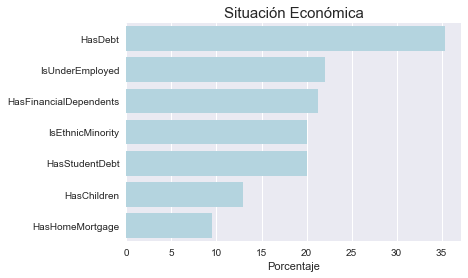

In [25]:
sns.barplot(x=sp2.Porcentaje,y=sp2.index,color='lightblue')
sns.set_style("white")
plt.title('Situación Económica',size=15)
plt.xlabel('Porcentaje')
plt.show()

### Descripción estudiantes

In [26]:
# Reemplazamos los no contestados por Ns/N

sp['MaritalStatus'] = sp.MaritalStatus.str.replace('0','NS/NC')
sp['EmploymentField'] = sp.EmploymentField.replace(0,'Ns/NC')
sp['Gender'] = sp.Gender.str.replace('0','NS/NC')
sp['CountryLive'] = sp.CountryLive.replace(0,'NS/NC')

C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

#### Edades

In [27]:
# Agrupamos edades por intervalos en nueva columna
def clasf(x):
    if x<=15:
        return 'Under 15 years'
    elif 15<x<=20:
        return '15-20 years'
    elif 20<x<=25:
        return '21-25 years'
    elif 25 <x <=30:
        return '26-30 years'
    elif 30< x <=40:
        return '31-40 years'
    elif 40< x <= 50:
        return '41-50 years'
    elif x>50:
        return 'Over 51 years'
    else:
        return 'NS/NC'
        
sp['Age_int'] = sp['Age'].map(clasf)

C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


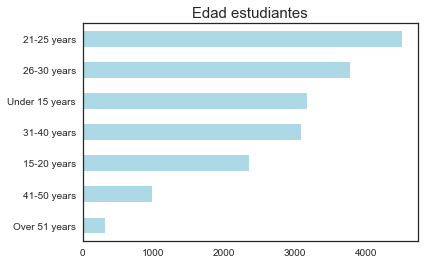

In [28]:
(sp['Age_int'].value_counts(ascending=True).plot.barh(color='lightblue').set_title('Edad estudiantes',size=15))

#### Sexo

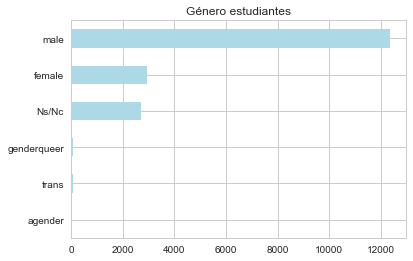

In [29]:
sns.set_style("whitegrid")
(sp['Gender'].value_counts(ascending=True).plot.barh(color='lightblue').set_title('Género estudiantes'))

#### Profesión

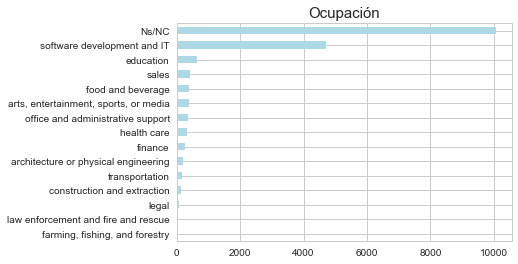

In [30]:
(sp['EmploymentField'].value_counts(ascending=True).plot.barh(color='lightblue').set_title('Ocupación',size=15))

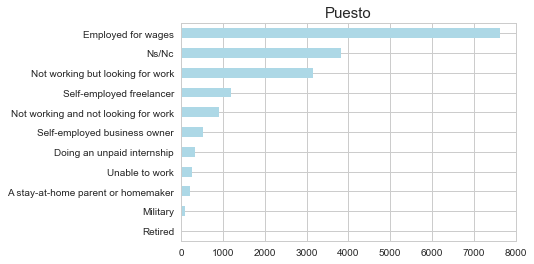

In [31]:
(prog['EmploymentStatus'].value_counts(ascending=True).plot.barh(color='lightblue').set_title('Puesto',size=15))

#### Estado Civil

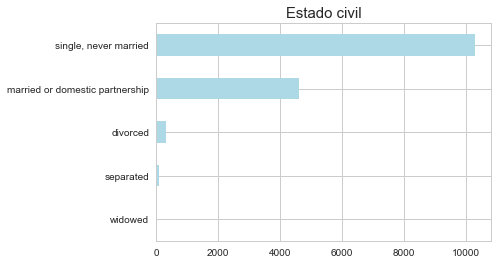

In [32]:
(sp['MaritalStatus'].value_counts(ascending=True).plot.barh(color='lightblue').set_title('Estado civil',size=15))

#### TITULACIÓN ESTUDIANTES

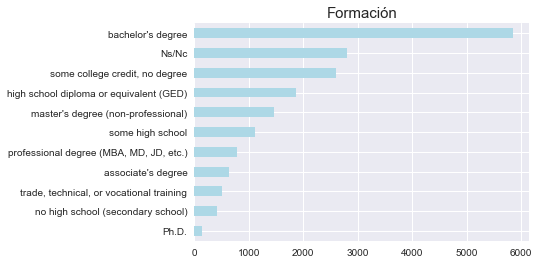

In [96]:
(prog['SchoolDegree'].value_counts(ascending=True).plot.barh(color='lightblue').set_title('Titulación',size=15))

#### FORMACIÓN ESTUDIANTES

In [33]:
sm = prog['SchoolMajor'].value_counts()
sm = pd.DataFrame(sm)


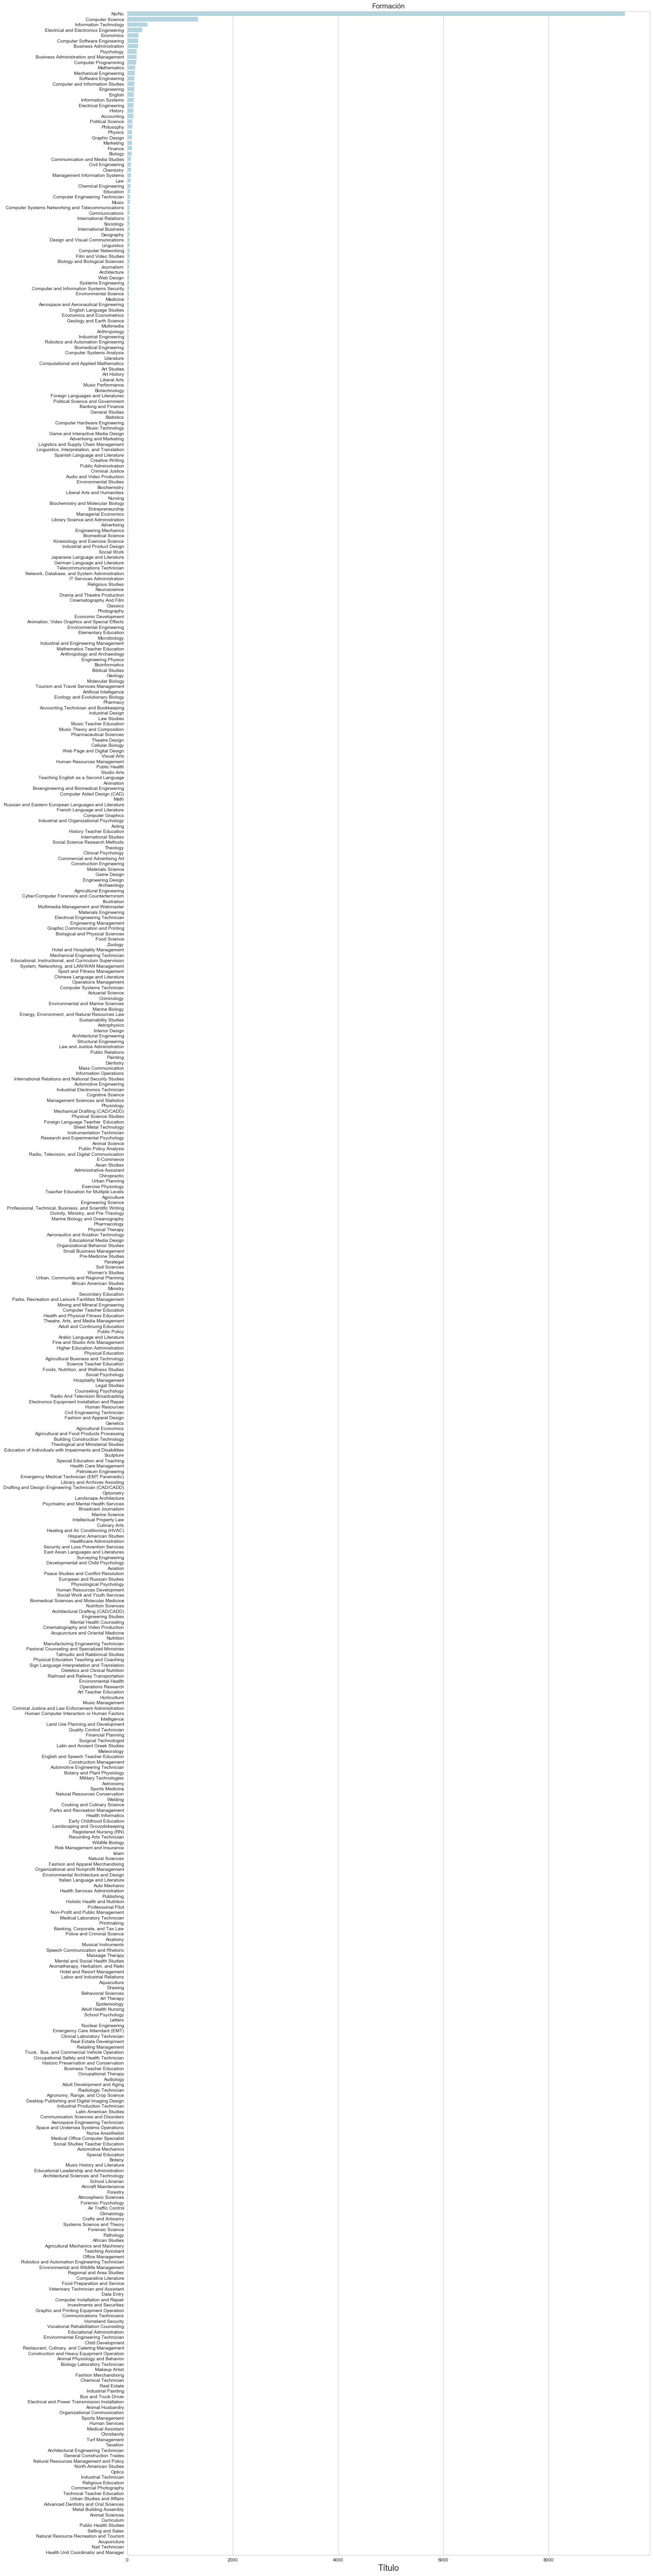

In [34]:
plt.figure(figsize=(20,100))
sns.barplot(x=sm.SchoolMajor,y=sm.index,color='lightblue')
sns.set_style("whitegrid")
plt.title('Formación',size=15)
plt.xlabel('Título',size=18)
plt.show()

#### País Origen Estudiantes

In [35]:
p = sp['CountryLive'].value_counts()
p = pd.DataFrame(p)
p = p.sort_values(ascending=False,by='CountryLive')


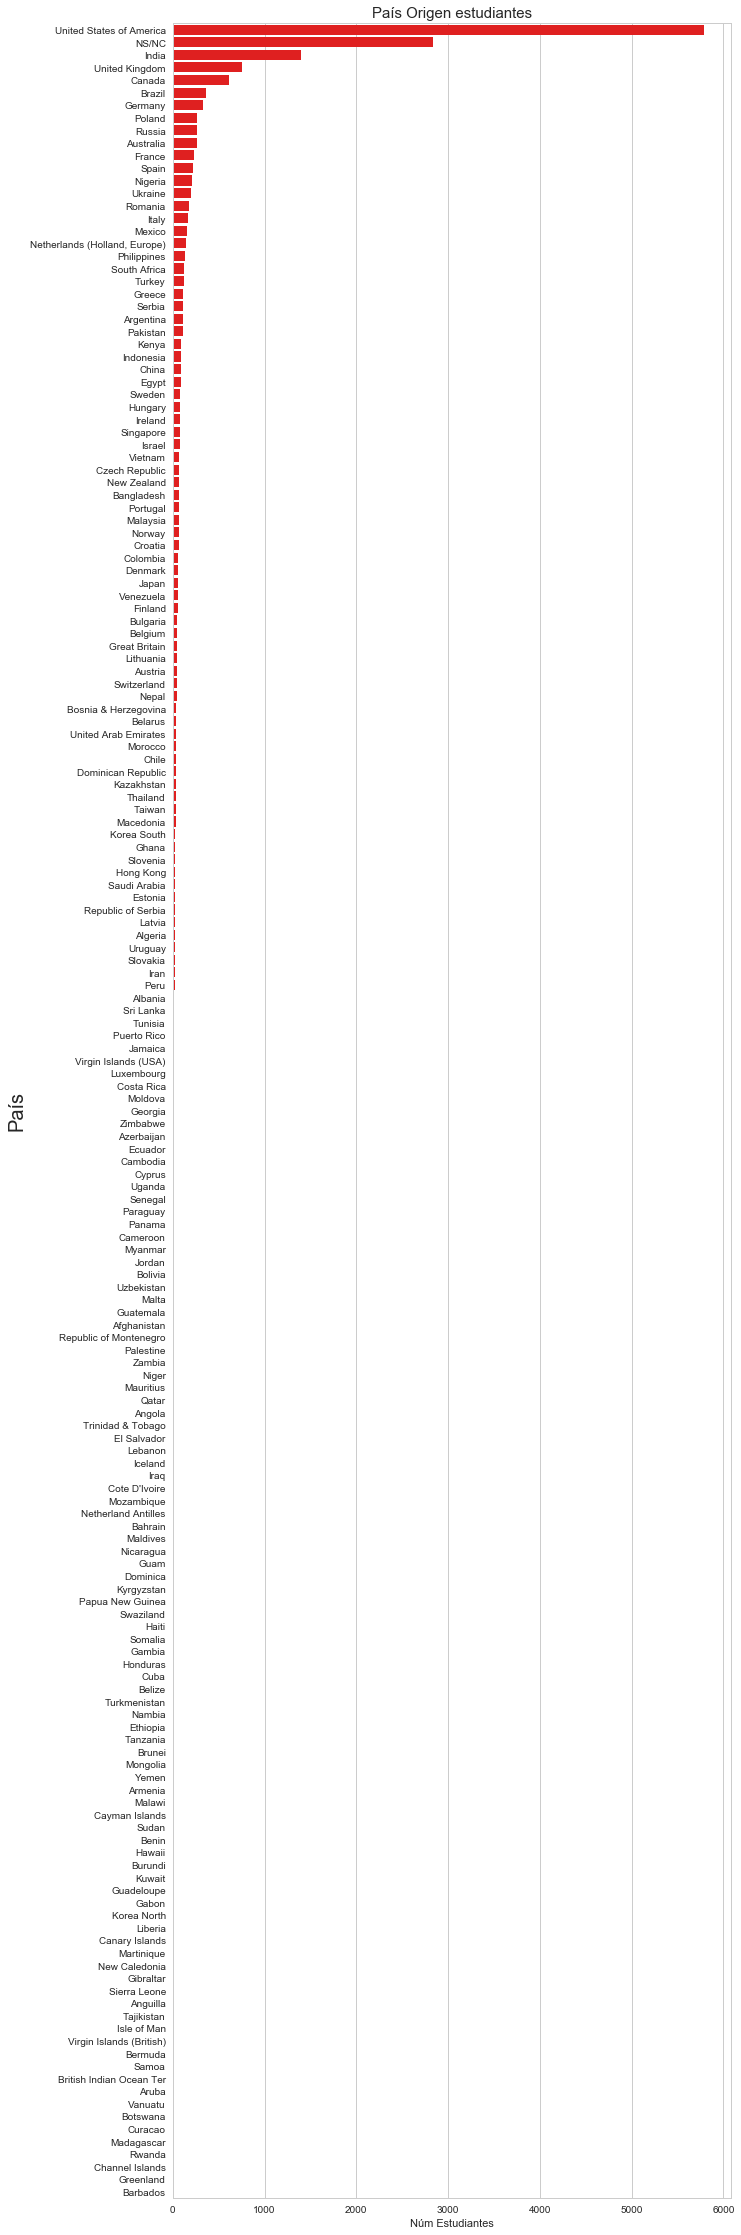

In [36]:
# GRÁFICO
plt.figure(figsize=(10,40))
sns.barplot(y=p.index,x=p.CountryLive,color='red')
plt.title('País Origen estudiantes',size=15)
plt.xlabel('Núm Estudiantes')
plt.ylabel('País',size=20)
plt.show()

### Preferencias Trabajo estudiantes

In [37]:
tr = prog[['IsSoftwareDev',
 'IsUnderEmployed',
 'JobApplyWhen',
 'JobInterestBackEnd',
 'JobInterestDataEngr',
 'JobInterestDataSci',
 'JobInterestDevOps',
 'JobInterestFrontEnd',
 'JobInterestFullStack',
 'JobInterestGameDev',
 'JobInterestInfoSec',
 'JobInterestMobile',
 'JobInterestOther',
 'JobInterestProjMngr',
 'JobInterestQAEngr',
 'JobInterestUX',
 'JobPref',
 'JobWherePref'
]]


In [38]:
# Reemplazamos 0 por Ns/Nc
tr['JobPref']=tr.JobPref.replace(0,'Ns/Nc')
tr['JobWherePref']=tr.JobWherePref.replace(0,'Ns/Nc')
tr['JobApplyWhen'] =tr.JobApplyWhen.replace(0,'Ns/Nc')

C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

#### Preferencias de lugar de trabajo

In [39]:
tr1 = tr.JobPref.value_counts()
tr1 = pd.DataFrame(tr1)
tr1.reset_index()
tr1['Ratio'] = (tr1.JobPref/18175)*100


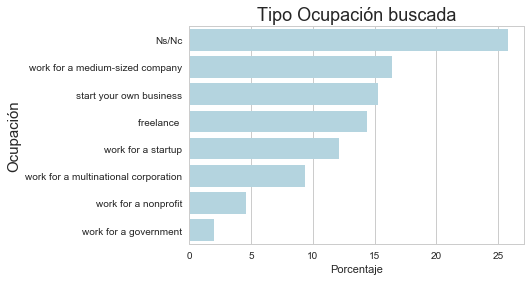

In [40]:
# GRÁFICO
sns.barplot(y=tr1.index,x=tr1.Ratio,color='lightblue')
sns.set_style("whitegrid")
plt.title('Tipo Ocupación buscada',size=18)
plt.xlabel('Porcentaje')
plt.ylabel('Ocupación',size=15)
plt.show()

#### PLAZO BÚSQUEDA DE EMPLEO

In [41]:
tr2 = tr.JobApplyWhen.value_counts()
tr2 = pd.DataFrame(tr2)
tr2.reset_index()
tr2['Ratio'] = (tr2.JobApplyWhen/18175)*100


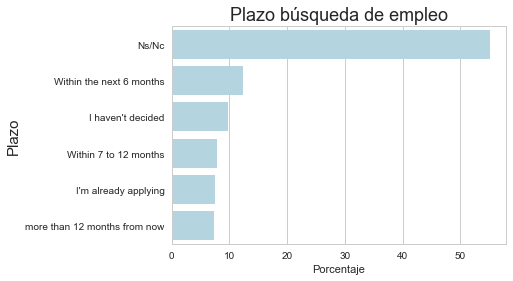

In [42]:
sns.barplot(y=tr2.index,x=tr2.Ratio,color='lightblue')
sns.set_style("whitegrid")
plt.title('Plazo búsqueda de empleo',size=18)
plt.xlabel('Porcentaje')
plt.ylabel('Plazo',size=15)
plt.show()

#### PREFERENCIA LUGAR DE TRABAJO

In [43]:
tr3 = tr.JobWherePref.value_counts()
tr3 = pd.DataFrame(tr3)
tr3.reset_index()
tr3['Ratio'] = (tr3.JobWherePref/18175)*100

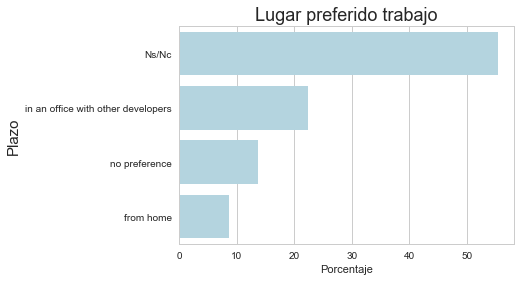

In [44]:
sns.barplot(y=tr3.index,x=tr3.Ratio,color='lightblue')
sns.set_style("whitegrid")
plt.title('Lugar preferido trabajo',size=18)
plt.xlabel('Porcentaje')
plt.ylabel('Plazo',size=15)
plt.show()

#### SALIDAS PROFESIONALES DESEADAS

In [45]:
tr4 =  prog[[
 'JobInterestBackEnd',
 'JobInterestDataEngr',
 'JobInterestDataSci',
 'JobInterestDevOps',
 'JobInterestFrontEnd',
 'JobInterestFullStack',
 'JobInterestGameDev',
 'JobInterestInfoSec',
 'JobInterestMobile',
 'JobInterestOther',
 'JobInterestProjMngr',
 'JobInterestQAEngr',
 'JobInterestUX']]

In [46]:
# Eliminamos el prefijo 'jobinterest' para mayor claridad
tr4.columns=tr4.columns.str.replace('JobInterest','')

In [47]:
tr5 = tr4.sum(axis=0)
tr5 = pd.DataFrame(tr5)
tr5.reset_index()
tr5.rename(columns={0:'Quantity'},inplace=True)
tr5 = tr5.sort_values(ascending=False, by='Quantity')

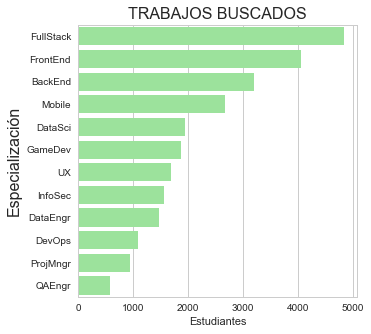

In [48]:
# Gráfico
plt.figure(figsize=(5,5))
sns.barplot(x=tr5.Quantity,y=tr5.index,color='lightgreen')
sns.set_style("whitegrid")
plt.title('TRABAJOS BUSCADOS',size=16)
plt.ylabel('Especialización',size=16)
plt.xlabel('Estudiantes')
plt.show()

#### Salidas profesionales hombre/mujer

In [49]:
tr5 =  prog[['Gender',
 'JobInterestBackEnd',
 'JobInterestDataEngr',
 'JobInterestDataSci',
 'JobInterestDevOps',
 'JobInterestFrontEnd',
 'JobInterestFullStack',
 'JobInterestGameDev',
 'JobInterestInfoSec',
 'JobInterestMobile',
 'JobInterestOther',
 'JobInterestProjMngr',
 'JobInterestQAEngr',
 'JobInterestUX']]

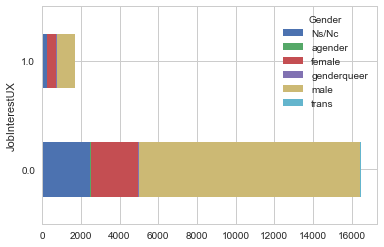

In [50]:
(tr5.groupby(['JobInterestUX','Gender']).size().unstack().plot.barh(stacked=True))

#### ASISTENCIA A EVENTOS PAISES. EVENTOS MÁS POPULARES EN CADA PAÍS

In [56]:
pr1 =  pr.groupby('CountryLive',as_index=False).CodeEventConferences.sum()
pr2 =  pr.groupby('CountryLive',as_index=False).CodeEventDjangoGirls.sum()
pr3 =  pr.groupby('CountryLive',as_index=False).CodeEventFCC.sum()
pr4 =  pr.groupby('CountryLive',as_index=False).CodeEventGameJam.sum()
pr5 =  pr.groupby('CountryLive',as_index=False).CodeEventGirlDev.sum()
pr6 =  pr.groupby('CountryLive',as_index=False).CodeEventHackathons.sum()
pr7 =  pr.groupby('CountryLive',as_index=False).CodeEventMeetup.sum()
pr8 =  pr.groupby('CountryLive',as_index=False).CodeEventNodeSchool.sum()
pr9 =  pr.groupby('CountryLive',as_index=False).CodeEventNone.sum()
pr10 = pr.groupby('CountryLive',as_index=False).CodeEventOther.sum()
pr11 = pr.groupby('CountryLive',as_index=False).CodeEventRailsBridge.sum()
pr12 = pr.groupby('CountryLive',as_index=False).CodeEventRailsGirls.sum()
pr13 = pr.groupby('CountryLive',as_index=False).CodeEventWorkshops.sum()
pr14 = pr.groupby('CountryLive',as_index=False).CodeEventStartUpWknd.sum()
pr15 = pr.groupby('CountryLive',as_index=False).CodeEventWkdBootcamps.sum()
pr16 = pr.groupby('CountryLive',as_index=False).CodeEventWomenCode.sum()
pr17 = pr.groupby('CountryLive',as_index=False).CodeEventWorkshops.sum()

In [73]:
listi = [pr1,pr2,pr3,pr4,pr5,pr6,pr7,pr8,pr9,pr10,pr11,pr12,pr13,pr14,pr15,pr16,pr17]
code = reduce(lambda right,left:pd.merge(right,left,on=['CountryLive']),listi)
code.drop([0, ],inplace=True)
code['Total'] = code[code.columns].sum(axis=1)
code.head()

,CountryLive,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventWorkshops_x,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops_y,Total
1,Afghanistan,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0
2,Albania,2.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,NaN,0.0,0.0,2.0,3.0,0.0,0.0,2.0,14.0
3,Algeria,2.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,2.0,2.0,0.0,0.0,2.0,13.0
4,Angola,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,1.0,2.0,0.0,0.0,10.0
5,Anguilla,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,Argentina,15.0,0.0,19.0,3.0,1.0,9.0,23.0,2.0,7.0,NaN,0.0,0.0,14.0,2.0,6.0,2.0,14.0,117.0
7,Armenia,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
8,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Australia,10.0,0.0,14.0,1.0,0.0,13.0,46.0,1.0,15.0,NaN,0.0,4.0,19.0,7.0,9.0,6.0,19.0,164.0
10,Austria,4.0,1.0,7.0,0.0,1.0,2.0,5.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0,2.0,6.0,41.0


#### Conferencias

In [74]:
code.sort_values(ascending=False,by='CodeEventConferences').head(10)


,CountryLive,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventWorkshops_x,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops_y,Total
162,United States of America,437.0,23.0,413.0,77.0,198.0,606.0,1143.0,92.0,409.0,NaN,68.0,19.0,460.0,117.0,147.0,269.0,460.0,4938.0
72,India,106.0,20.0,176.0,22.0,5.0,269.0,121.0,34.0,56.0,NaN,9.0,9.0,217.0,42.0,48.0,14.0,217.0,1365.0
30,Canada,49.0,2.0,49.0,11.0,1.0,79.0,98.0,14.0,32.0,NaN,4.0,5.0,58.0,17.0,13.0,15.0,58.0,505.0
23,Brazil,42.0,7.0,43.0,15.0,3.0,43.0,48.0,13.0,12.0,NaN,2.0,8.0,65.0,23.0,11.0,4.0,65.0,404.0
144,Spain,40.0,2.0,14.0,4.0,0.0,30.0,48.0,3.0,15.0,NaN,0.0,3.0,26.0,11.0,0.0,4.0,26.0,226.0
125,Poland,39.0,3.0,24.0,4.0,0.0,14.0,35.0,5.0,14.0,NaN,1.0,6.0,25.0,3.0,10.0,2.0,25.0,210.0
53,France,36.0,1.0,9.0,2.0,0.0,21.0,35.0,7.0,10.0,NaN,0.0,3.0,22.0,11.0,3.0,1.0,22.0,183.0
132,Russia,33.0,5.0,24.0,3.0,3.0,17.0,4.0,13.0,14.0,NaN,0.0,3.0,14.0,4.0,8.0,5.0,14.0,164.0
161,United Kingdom,30.0,7.0,47.0,9.0,1.0,53.0,96.0,8.0,48.0,NaN,2.0,7.0,51.0,5.0,15.0,18.0,51.0,448.0
79,Italy,26.0,1.0,5.0,1.0,0.0,11.0,9.0,3.0,11.0,NaN,0.0,0.0,21.0,3.0,2.0,0.0,21.0,114.0


#### HACKATHONS

In [75]:
code.sort_values(ascending=False,by='CodeEventHackathons')    

,CountryLive,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventWorkshops_x,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops_y,Total
162,United States of America,437.0,23.0,413.0,77.0,198.0,606.0,1143.0,92.0,409.0,NaN,68.0,19.0,460.0,117.0,147.0,269.0,460.0,4938.0
72,India,106.0,20.0,176.0,22.0,5.0,269.0,121.0,34.0,56.0,NaN,9.0,9.0,217.0,42.0,48.0,14.0,217.0,1365.0
30,Canada,49.0,2.0,49.0,11.0,1.0,79.0,98.0,14.0,32.0,NaN,4.0,5.0,58.0,17.0,13.0,15.0,58.0,505.0
161,United Kingdom,30.0,7.0,47.0,9.0,1.0,53.0,96.0,8.0,48.0,NaN,2.0,7.0,51.0,5.0,15.0,18.0,51.0,448.0
23,Brazil,42.0,7.0,43.0,15.0,3.0,43.0,48.0,13.0,12.0,NaN,2.0,8.0,65.0,23.0,11.0,4.0,65.0,404.0
57,Germany,25.0,2.0,18.0,7.0,1.0,32.0,35.0,7.0,6.0,NaN,1.0,5.0,29.0,6.0,9.0,5.0,29.0,217.0
144,Spain,40.0,2.0,14.0,4.0,0.0,30.0,48.0,3.0,15.0,NaN,0.0,3.0,26.0,11.0,0.0,4.0,26.0,226.0
84,Kenya,8.0,3.0,15.0,2.0,2.0,26.0,9.0,2.0,1.0,NaN,1.0,1.0,15.0,5.0,13.0,3.0,15.0,121.0
116,Nigeria,24.0,1.0,31.0,1.0,1.0,24.0,15.0,1.0,14.0,NaN,0.0,0.0,22.0,7.0,12.0,0.0,22.0,175.0
159,Ukraine,24.0,1.0,34.0,4.0,3.0,23.0,7.0,15.0,7.0,NaN,1.0,3.0,15.0,9.0,12.0,4.0,15.0,177.0
